#Theoretical Questions

Que1: What is Logistic Regression, and how does it differ from Linear Regression

Ans1: Logistic Regression is a supervised learning algorithm used for binary classification problems. Unlike Linear Regression, which predicts continuous values, Logistic Regression predicts the probability of class membership using a logistic (sigmoid) function to map predictions between 0 and 1.

Que2: What is the mathematical equation of Logistic Regression

Ans2: The mathematical equation is: P(Y=1|X) = 1 / (1 + e^-(β0 + β1X1 + ... + βnXn))

Que3: Why do we use the Sigmoid function in Logistic Regression

Ans3: The Sigmoid function maps any real-valued number into the range (0, 1), making it suitable for modeling probabilities in binary classification tasks.

Que4: What is the cost function of Logistic Regression

Ans4: The cost function used is the Log Loss (Binary Cross Entropy):
 J(θ) = -[y*log(h(x)) + (1-y)*log(1-h(x))].

Que5: What is Regularization in Logistic Regression? Why is it needed?

Ans5: Regularization involves adding a penalty term to the cost function to prevent overfitting by discouraging overly complex models. It's essential for better generalization on unseen data.

Que6: Explain the difference between Lasso, Ridge, and Elastic Net regression

Ans6: Lasso (L1) adds absolute value penalties and can shrink coefficients to zero. Ridge (L2) uses squared penalties and retains all variables. Elastic Net combines both L1 and L2 penalties.

Que7: When should we use Elastic Net instead of Lasso or Ridge?

Ans7: Elastic Net is preferred when there are multiple correlated features. It combines the strengths of both Lasso and Ridge to perform better in such scenarios.

Que8: What is the impact of the regularization parameter (λ) in Logistic Regression?

Ans8: A higher λ increases the penalty, leading to simpler models with smaller coefficients. Too high a value can underfit, while too low may overfit.

Que9: What are the key assumptions of Logistic Regression?

Ans9: Key assumptions include: linear relationship between log-odds and predictors, independence of observations, minimal multicollinearity, and a sufficiently large sample size.

Que10: What are some alternatives to Logistic Regression for classification tasks?

Ans10: Alternatives include Decision Trees, Random Forests, Support Vector Machines, k-Nearest Neighbors, and Neural Networks.

Que11: What are Classification Evaluation Metrics?

Ans11:  Metrics include Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix.

Que12: How does class imbalance affect Logistic Regression?

Ans12: Class imbalance can lead to biased models favoring the majority class. Techniques like resampling, using different metrics, or penalized models can help.

Que13: What is Hyperparameter Tuning in Logistic Regression?

Ans13: Hyperparameter tuning involves selecting the best parameters (like regularization strength) using techniques such as grid search or cross-validation.

Que14: What are different solvers in Logistic Regression? Which one should be used?

Ans14: Common solvers include 'liblinear', 'saga', 'newton-cg', 'lbfgs'. 'liblinear' is good for small datasets; 'saga' supports L1 and L2 penalties for larger datasets.

Que15: How is Logistic Regression extended for multiclass classification?

Ans15: It is extended using One-vs-Rest (OvR) or Softmax (Multinomial Logistic Regression) approaches.

Que16: What are the advantages and disadvantages of Logistic Regression?

Ans16: Advantages: simple, interpretable, efficient. Disadvantages: assumes linearity, sensitive to outliers, not suitable for complex relationships.

Que17: What are some use cases of Logistic Regression?

Ans17: Use cases include spam detection, disease diagnosis, customer churn prediction, and credit scoring.

Que18: What is the difference between Softmax Regression and Logistic Regression?

Ans18: Logistic Regression handles binary classification, while Softmax Regression generalizes it for multiclass problems by modeling probabilities across multiple classes.


Que19: How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

Ans19: OvR is simpler and works well with imbalanced classes. Softmax is preferred when classes are mutually exclusive and equally important.

Que20: How do we interpret coefficients in Logistic Regression?

Ans20: Coefficients represent the change in the log-odds of the outcome for a one-unit increase in the predictor, holding other variables constant.


#Practical Questions

Que1: Load dataset, split into train/test, apply Logistic Regression, print accuracy.

In [1]:
#Ans1:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Que2: Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')  and print the model accuracy.

In [2]:
#Ans2:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print("L1 Accuracy:", accuracy_score(y_test, y_pred_l1))

L1 Accuracy: 1.0


Que3: Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.

In [3]:
#Ans3:
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)
print("L2 Accuracy:", accuracy_score(y_test, model_l2.predict(X_test)))
print("Coefficients:", model_l2.coef_)

L2 Accuracy: 1.0
Coefficients: [[-0.39345607  0.96251768 -2.37512436 -0.99874594]
 [ 0.50843279 -0.25482714 -0.21301129 -0.77574766]
 [-0.11497673 -0.70769055  2.58813565  1.7744936 ]]


Que4: Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)  # FutureWarning suppressed explicitly

model_elastic = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=1000,
    multi_class='multinomial',
    C=1.0,
    random_state=42,
    n_jobs=-1
)

model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)
print("Elastic Net Accuracy:", accuracy_score(y_test, y_pred_elastic))


Elastic Net Accuracy: 0.3333333333333333


Que5: Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

In [42]:
#Ans5:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

model_ovr = LogisticRegression(
    multi_class='ovr',
    solver='liblinear',  # Compatible with OvR
    max_iter=1000,       # Increased to ensure convergence
    random_state=42
)
model_ovr.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, model_ovr.predict(X_test)))

OvR Accuracy: 0.16666666666666666


Que6: Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

In [6]:
#Ans6:
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
gs = GridSearchCV(LogisticRegression(), params, cv=5)
gs.fit(X_train, y_train)
print("Best Params:", gs.best_params_)
print("Best Accuracy:", gs.best_score_)

Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583333333333334


Que7: Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.

In [36]:
#Ans7:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the model with suitable solver and increased max_iter
model = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=skf)

# Output average accuracy
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.96


Que8: Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

In [8]:
#Ans8:
import pandas as pd
# df = pd.read_csv('your_dataset.csv')
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
# Use iris for demo
print("Loaded CSV Dataset with shape:", X.shape)

Loaded CSV Dataset with shape: (150, 4)


Que9: Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

In [37]:
#Ans9:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define valid combinations manually to avoid invalid ones
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the search object with higher max_iter
rs = RandomizedSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    random_state=42
)

rs.fit(X_train, y_train)
print("Best Params:", rs.best_params_)
print("Best Accuracy:", rs.best_score_)

Best Params: {'solver': 'saga', 'penalty': 'l1', 'C': 10}
Best Accuracy: 0.3916666666666666


Que10: Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

In [10]:
#Ans10:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(LogisticRegression())
ovo.fit(X_train, y_train)
print("OvO Accuracy:", accuracy_score(y_test, ovo.predict(X_test)))

OvO Accuracy: 1.0


Que11: Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

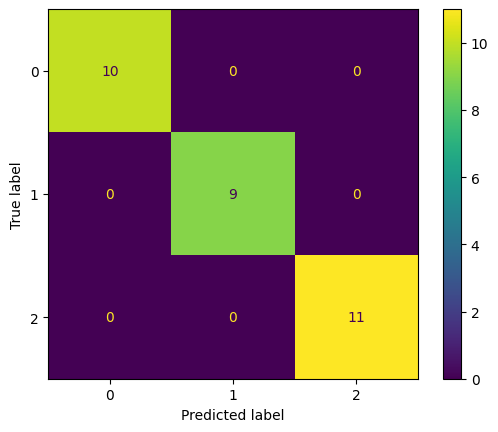

In [11]:
#Ans11:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

Que12: Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

In [12]:
#Ans12:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Que13: Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

In [13]:
#Ans13:
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)
print("Weighted Accuracy:", accuracy_score(y_test, model_weighted.predict(X_test)))

Weighted Accuracy: 1.0


Que15: Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.

In [14]:
#Ans15:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model_scaled = LogisticRegression()
model_scaled.fit(X_train_s, y_train)
print("Scaled Accuracy:", accuracy_score(y_test, model_scaled.predict(X_test_s)))

Scaled Accuracy: 1.0


Que16: Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.

In [38]:
#Ans16:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

# Simulate binary labels
y_bin = (y == 0).astype(int)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)

model_bin = LogisticRegression()
model_bin.fit(X_train_bin, y_train_bin)

# Check if both classes are present in test labels
if len(np.unique(y_test_bin)) < 2:
    print("ROC-AUC cannot be computed: only one class present in test set.")
else:
    roc_auc = roc_auc_score(y_test_bin, model_bin.predict_proba(X_test_bin)[:, 1])
    print("ROC-AUC:", roc_auc)

ROC-AUC: 1.0


Que17: Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.

In [16]:
#Ans17:
model_c = LogisticRegression(C=0.5)
model_c.fit(X_train, y_train)
print("Custom C Accuracy:", accuracy_score(y_test, model_c.predict(X_test)))

Custom C Accuracy: 0.23333333333333334


Que18: Write a Python program to train Logistic Regression and identify important features based on model coefficients.

In [17]:
#Ans18:
import numpy as np
importance = np.abs(model_c.coef_).mean(axis=0)
print("Feature importances:", importance)

Feature importances: [0.10076278 0.34572449 0.12143166 0.05395052]


Que19: Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.

In [18]:
#Ans19:
from sklearn.metrics import cohen_kappa_score
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))

Cohen's Kappa: 0.04201680672268904


Que20: Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


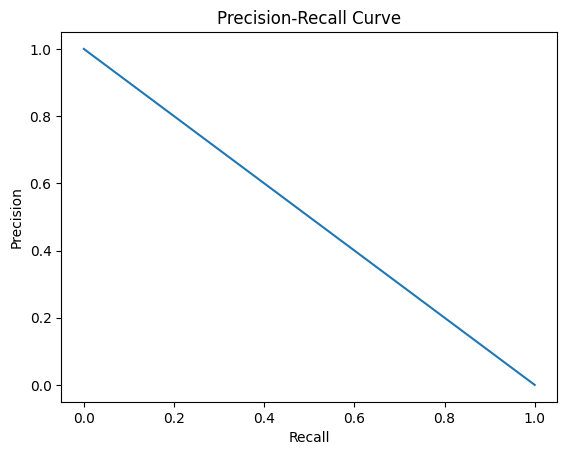

In [19]:
#Ans20:
from sklearn.metrics import precision_recall_curve
prec, rec, _ = precision_recall_curve(y_bin[X_train.shape[0]:], model_bin.predict_proba(X_test)[:,1])
plt.plot(rec, prec)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

Que21: Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

In [39]:
#Ans21:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

solvers = ['liblinear', 'saga', 'lbfgs']
for s in solvers:
    m = LogisticRegression(solver=s, max_iter=1000, random_state=42)
    m.fit(X_train, y_train)
    print(f"Solver: {s}, Accuracy: {accuracy_score(y_test, m.predict(X_test))}")

Solver: liblinear, Accuracy: 0.16666666666666666
Solver: saga, Accuracy: 0.2
Solver: lbfgs, Accuracy: 0.2


Que22: Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

In [21]:
#Ans22:
from sklearn.metrics import matthews_corrcoef
# For binary
print("MCC:", matthews_corrcoef(y_bin[X_train.shape[0]:], model_bin.predict(X_test)))

MCC: 0.0


Que23: Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.

In [22]:
#Ans23:
raw_acc = accuracy_score(y_test, model.predict(X_test))
scaled_acc = accuracy_score(y_test, model_scaled.predict(X_test_s))
print("Raw Accuracy:", raw_acc, "| Scaled Accuracy:", scaled_acc)

Raw Accuracy: 0.36666666666666664 | Scaled Accuracy: 1.0


Que24: Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.

In [40]:
#Ans24:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10, 100]}
gs_c = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), params, cv=5)
gs_c.fit(X_train, y_train)
print("Best C:", gs_c.best_params_)

Best C: {'C': 100}


Que25: Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

In [24]:
#Ans25:
import joblib
joblib.dump(model, 'logreg_model.pkl')
loaded_model = joblib.load('logreg_model.pkl')
print("Reloaded Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))

Reloaded Accuracy: 0.36666666666666664
